# CSE 4038 - Computer Vision in Health Care Lab
### Name: V Padmaja
### RegNo: 19BAI1107
## Lab Experiment 5: Optical Flow

### Mounting the drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Import necessary Libraries

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Lucas-Kanade method

In [3]:
def Lucas_Kanade(cap):  
  # params for corner detection
  feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )
    
  # Parameters for lucas kanade optical flow
  lk_params = dict( winSize = (15, 15),
                    maxLevel = 2,
                    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                10, 0.03))
    
  # Create some random colors
  color = np.random.randint(0, 255, (100, 3))
    
  # Take first frame and find corners in it
  ret, old_frame = cap.read()
  old_gray = cv2.cvtColor(old_frame,
                          cv2.COLOR_BGR2GRAY)
  p0 = cv2.goodFeaturesToTrack(old_gray, mask = None,
                              **feature_params)
    
  # Create a mask image for drawing purposes
  mask = np.zeros_like(old_frame)
  j=1 
  while(1):
        
      ret, frame = cap.read()
      frame_gray = cv2.cvtColor(frame,
                                cv2.COLOR_BGR2GRAY)
    
      # calculate optical flow
      p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,
                                            frame_gray,
                                            p0, None,
                                            **lk_params)
    
      # Select good points
      good_new = p1[st == 1]
      good_old = p0[st == 1]
    
      # draw the tracks
      for i, (new, old) in enumerate(zip(good_new, 
                                        good_old)):
          a, b = new.ravel()
          c, d = old.ravel()
          mask = cv2.line(mask, (a, b), (c, d),
                          color[i].tolist(), 2)
            
          frame = cv2.circle(frame, (a, b), 5,
                            color[i].tolist(), -1)
            
      img = cv2.add(frame, mask)
    
      #print('Frame '+str(j))
      j+=1
      if(j==2):
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,1)
        plt.imshow(img)
        plt.title("Initial Frame")
        plt.axis("off")
        
      if(j==200):
        plt.subplot(1,2,2)
        plt.imshow(img)
        plt.title("Optical Flow - Lucas Kanade")
        plt.axis("off")
        break
        
      #k = cv2.waitKey(25)
      #if k == 27:
          #break
    
      # Updating Previous frame and points 
      old_gray = frame_gray.copy()
      p0 = good_new.reshape(-1, 1, 2)


## i) slow_traffic_small.mp4

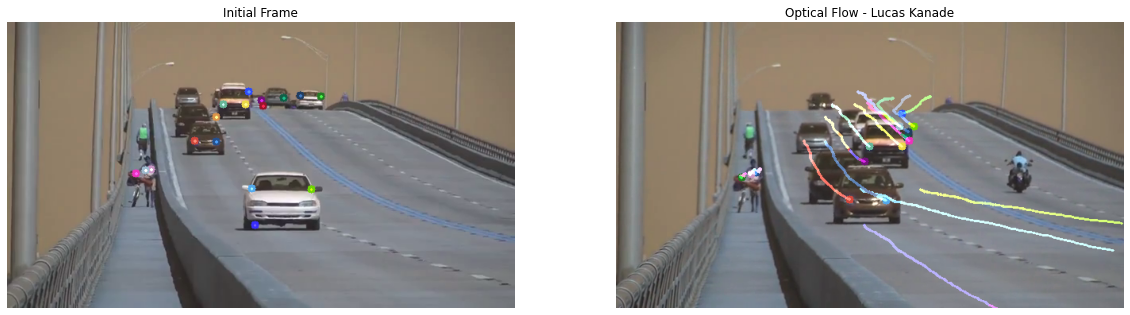

In [4]:
cap1 = cv2.VideoCapture('/content/gdrive/MyDrive/slow_traffic_small.mp4')
Lucas_Kanade(cap1)

## ii) vtest.avi

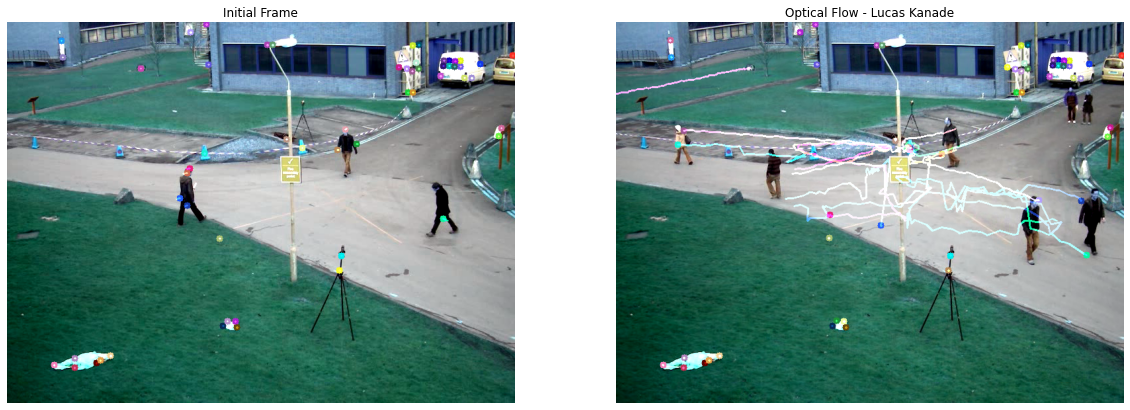

In [5]:
cap2 = cv2.VideoCapture('/content/gdrive/MyDrive/vtest.avi')
Lucas_Kanade(cap2)

### Inference: The Lucas Kanade optical flow approach has been successful in detecting the movement of objects in both the sample videos

## iii) CV_Lab5_Padmaja

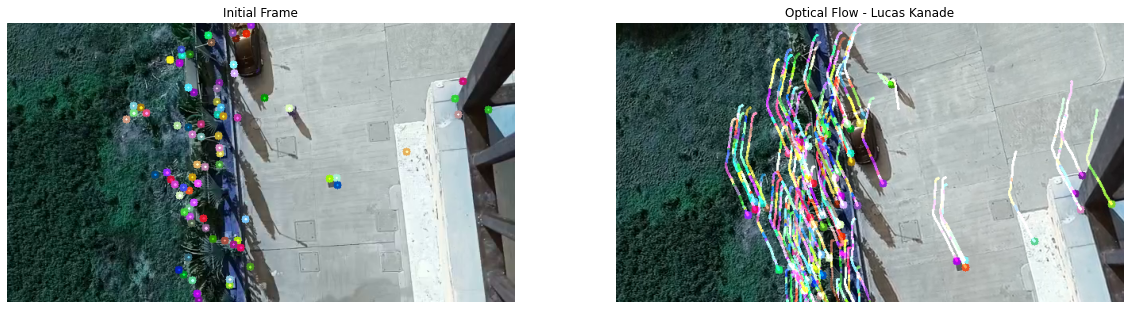

In [6]:
cap3 = cv2.VideoCapture('/content/gdrive/MyDrive/CV_Lab5_Padmaja.mp4')
Lucas_Kanade(cap3)

### Inference: The above video encompasses a person walking down the street, a car moving near the sidewalk and a few other birds and objects moving. The Lucas Kanade optical flow approach has been successful in detecting the movement of objects in this video as well.

# Horn-Schunck 

In [7]:
def Horn_Schunck(cap):      
  # ret = a boolean return value from
  # getting the frame, first_frame = the
  # first frame in the entire video sequence
  ret, first_frame = cap.read()
    
  # Converts frame to grayscale because we
  # only need the luminance channel for
  # detecting edges - less computationally 
  # expensive
  prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    
  # Creates an image filled with zero
  # intensities with the same dimensions 
  # as the frame
  mask = np.zeros_like(first_frame)
    
  # Sets image saturation to maximum
  mask[..., 1] = 255
  j=1
  while(cap.isOpened()):
        
      # ret = a boolean return value from getting
      # the frame, frame = the current frame being
      # projected in the video
      ret, frame = cap.read()
        
      # Opens a new window and displays the input
      # frame
      j+=1
      if(j==2):
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,1)
        plt.imshow(frame)
        plt.title("Initial Frame")
        plt.axis("off")
        
      # Converts each frame to grayscale - we previously 
      # only converted the first frame to grayscale
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
      # Calculates dense optical flow by Farneback method
      flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, 
                                        None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
        
      # Computes the magnitude and angle of the 2D vectors
      magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        
      # Sets image hue according to the optical flow 
      # direction
      mask[..., 0] = angle * 180 / np.pi / 2
        
      # Sets image value according to the optical flow
      # magnitude (normalized)
      mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        
      # Converts HSV to RGB (BGR) color representation
      rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        
      # Opens a new window and displays the output frame
      if(j==100):
        plt.subplot(1,2,2)
        plt.imshow(rgb)
        plt.title("Optical Flow - Horn Schunck")
        plt.axis("off")
        break
        
      # Updates previous frame
      prev_gray = gray

## i) slow_traffic_small.mp4

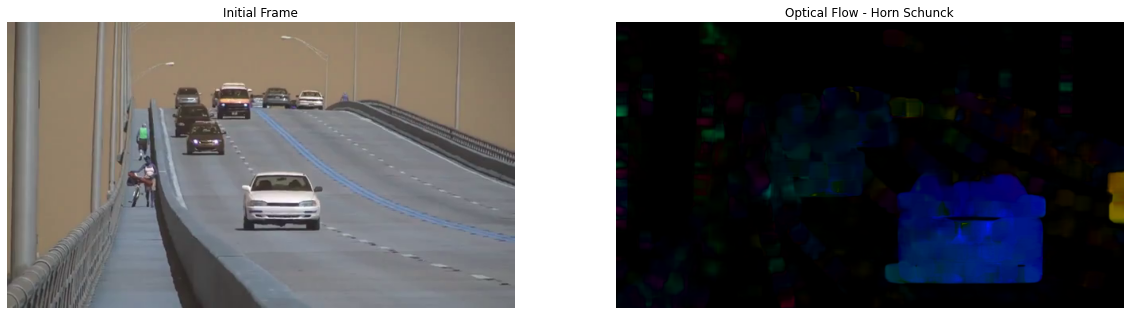

In [8]:
cap4 = cv2.VideoCapture('/content/gdrive/MyDrive/slow_traffic_small.mp4')
Horn_Schunck(cap4)

## ii) vtest.avi

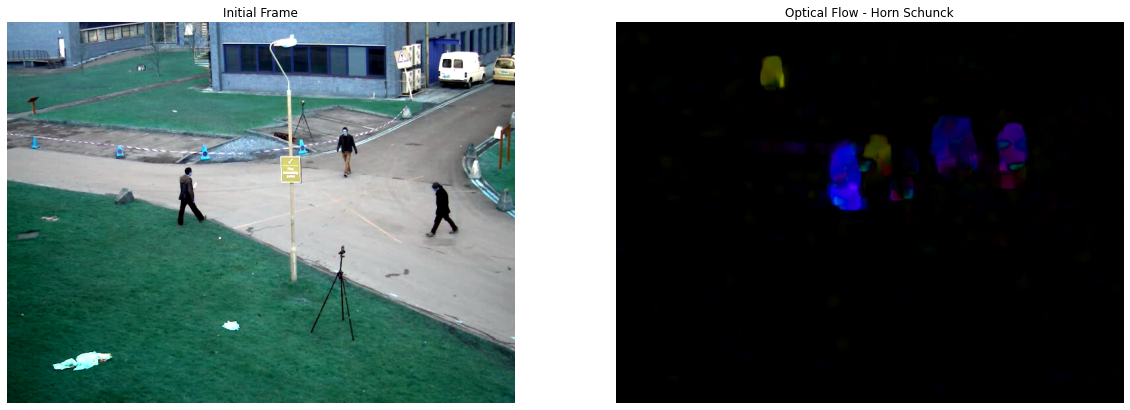

In [9]:
cap5 = cv2.VideoCapture('/content/gdrive/MyDrive/vtest.avi')
Horn_Schunck(cap5)

### Inference: The Horn Schunck optical flow approach has detected the movement of objects in both the sample videos, however the results are not as clear as compared to Lucas Kanade approach

## iii) CV_Lab5_Padmaja

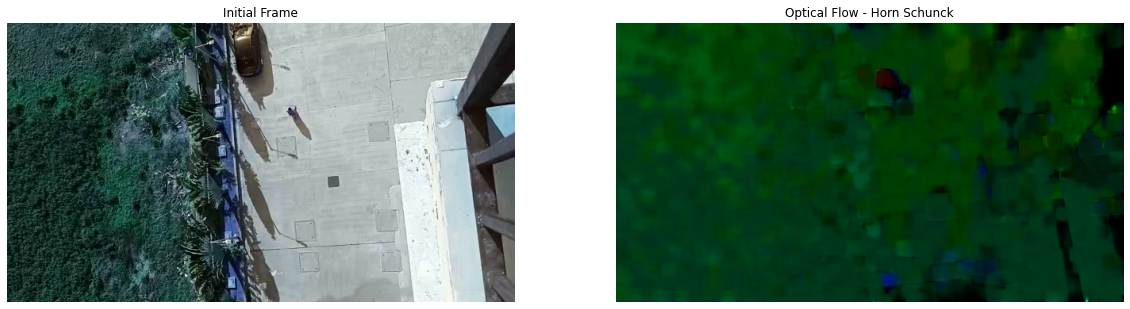

In [10]:
cap6 = cv2.VideoCapture('/content/gdrive/MyDrive/CV_Lab5_Padmaja.mp4')
Horn_Schunck(cap6)

### Inference: The above video encompasses a person walking down the street, a car moving near the sidewalk and a few other birds and objects moving. The Horn Schunck optical flow approach has detected the movement of objects in both the sample videos, however the results are not as clear as compared to Lucas Kanade approach